In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from IPython import display
import json

In [2]:
def read_parameters(filename):
    with open(filename) as f:
        return json.loads(f.read())

In [20]:
#Load without import (So I won't need to restart the kernel all the time)
with open("molecule.py") as f: exec(f.read())
with open("simulation.py") as f: exec(f.read())
with open("multispecies_simulation.py") as f: exec(f.read())

In [21]:
fast = Simulation(read_parameters("./setups/parameters_quick_fast_diffusion.json"))

fast.run()

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=500), HTML(value='')))

In [53]:
steps = range(3, 30,2)
results2 = {k:[] for k in steps}
for _ in tqdm(range(50)):
    mid = Simulation(read_parameters("./setups/parameters_quick_medium_diffusion.json"))
    slow = Simulation(read_parameters("./setups/parameters_quick_slow_diffusion.json"))
    mid.run(verbose = False)
    slow.run(verbose = False)
    two_species = TwoSpeciesSimulation(mid, slow)
    
    for s in steps:
        args, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(s + 1,
                                    bins = 200, p0 = [.2,2,.1])
        results2[s].append(args)
#     plt.bar(X,Y, width = .0002)
#     plt.plot(X, aY, '*')
    

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

In [73]:
np.sum(Y)

4094

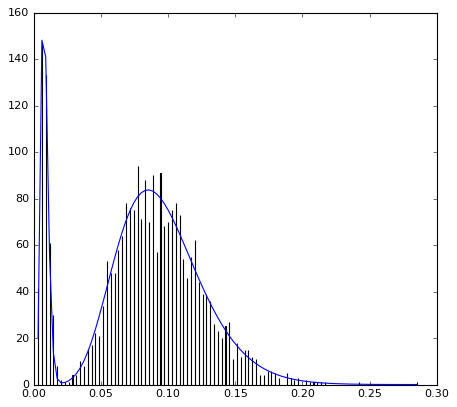

In [76]:
args, [X, Y, aY] = two_species.approxiamte_diffusion_coefficients(10,
                                    bins = 100, p0 = [.2,2,.1])
plt.bar(X,Y, .00004)
plt.plot(X,aY)

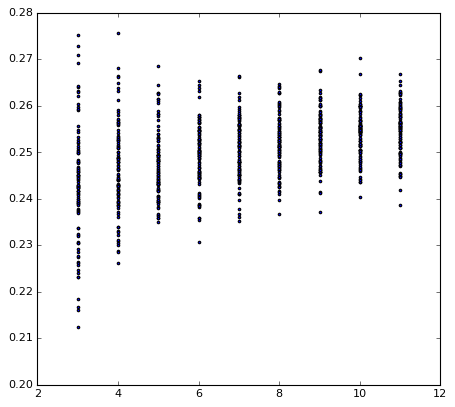

In [56]:
sigmas = []
for key, args in results.items():
    for arg in args:
        plt.scatter([key], arg[0], marker ='.')

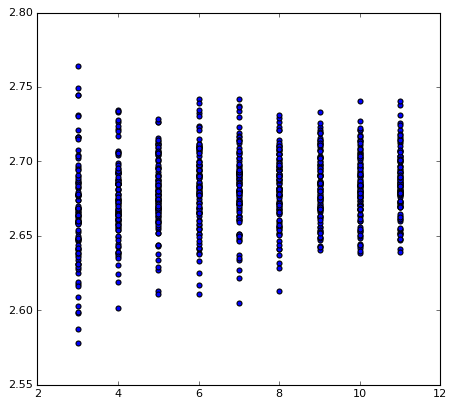

In [57]:
for key, args in results.items():
    for arg in args:
        plt.scatter([key], arg[1])

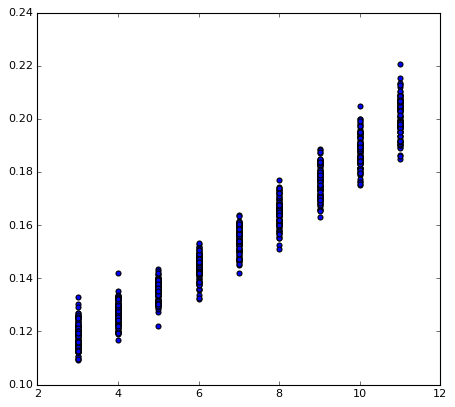

In [48]:
for key, args in results.items():
    for arg in args:
        plt.scatter([key], arg[2])

In [ ]:
plt.Normalize(0, 1000)

In [ ]:
plt.im